### 在逻辑回归中使用多项式

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.创建数据
#设置随机种子
np.random.seed(666)
# 服从正态分布的数据
X = np.random.normal(0,1,size=(200,2))
# X y 服从的关系为 x1^2^+x2^2^=1.5。因为是逻辑回归，所以这里的 y 是一个 0/1 的值。 在1.5 之内是 1
y = np.array((X[:,0]**2+X[:,1]**2)<1.5,dtype="int")

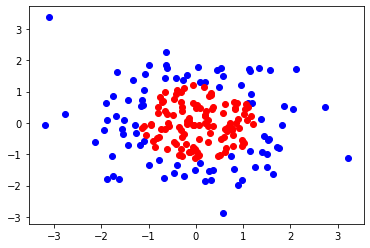

In [3]:
# 绘制图像
plt.scatter(X[y==0,0],X[y==0,1],color="blue")
plt.scatter(X[y==1,0],X[y==1,1],color="red")

### 不进行多项式回归的情况下拟合数据

In [4]:
# 2.不进行多项式的情况下将数据进行拟合
from pycharm_knn.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LinearRegression()

In [5]:
# 可以看到拟合的效果非常的不好
log_reg.score(X,y)

0.605

In [13]:
# 决策边界绘制图像
# 1.创建将数据可视化的方法
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


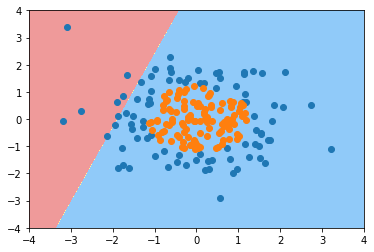

In [18]:
# 一定要先绘制边界，在绘制数据点，要不数据点的颜色会被覆盖
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

### 多项式回归的情况下拟合
在为进行多项式回归的时候可以看出来数据的拟合效果非常差，而且决策边界也很不符合

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [9]:
#1.多项式回归创建管道
# 在这里管道中可以传输自定义的 LogisticRegression 是因为这里的这个生成器是完全按照sklearn 中的方法明明的，所以可以被识别
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [10]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LinearRegression())],
         verbose=False)

In [11]:
#3.测试结果
poly_log_reg.score(X,y)

0.95

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


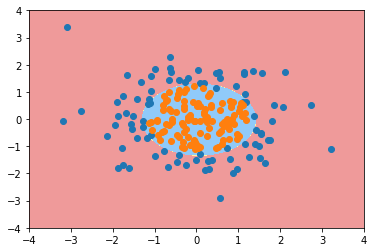

In [20]:
# 进行多项式回归之后决策边界就很准确了，而且准确率也很高
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

### 过拟合的用多项式回归处理过的逻辑回归

In [23]:
poly_log_reg20 = PolynomialLogisticRegression(degree=20)
poly_log_reg20.fit(X, y)
poly_log_reg20.score(X,y)

0.955

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


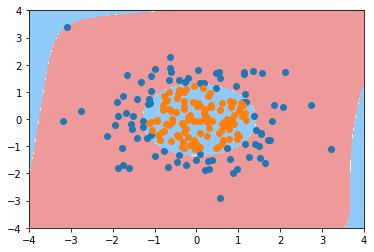

In [25]:
#绘制图像，会发现图像非常的敏感。可以用正则化的方式降低拟合程度
plot_decision_boundary(poly_log_reg20,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])